In [1]:
import pandas as pd
import numpy as np
import io
import glob
import os
print(os.listdir("../Capstone"))

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


['.DS_Store', 'Cap.ipynb', '.ipynb_checkpoints', 'ft']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
#We have 43 different image folders with 43 different CSV files
#Let's build one complete dataframe here to work with

data = []

path = '../Capstone/ft/Images' #read our path
all_files = glob.glob(path + '/**/*.csv') #read from the csv files in the image folder

for new in all_files:
    dfnew = pd.read_csv(new, sep=';', index_col=None, header=0) #read and organize our csv's
    dfnew['filename'] = os.path.dirname(new) #example: we're adding '../Capstone/ft/Images/00028'
    data.append(dfnew)
    
frame = pd.concat(data, axis=0, ignore_index=True) #concat list into dataframe
frame['name'] = frame['filename'] + '/' + frame['Filename'] #merge file name w/ dirname

df = frame.drop(['Filename', 'filename'], axis=1) #drop what isnt needed here

df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,name
0,38,35,5,5,33,30,31,../Capstone/ft/Images/00031/00000_00000.ppm
1,40,36,6,5,34,31,31,../Capstone/ft/Images/00031/00000_00001.ppm
2,40,37,5,5,34,32,31,../Capstone/ft/Images/00031/00000_00002.ppm
3,41,39,6,6,36,34,31,../Capstone/ft/Images/00031/00000_00003.ppm
4,43,37,6,5,38,32,31,../Capstone/ft/Images/00031/00000_00004.ppm


In [4]:
#How many unique classifiers do we have? Does it match the number of image files?

df.ClassId.nunique()

43

In [7]:
#It looks like we have a bit of a class imbalance

df.ClassId.value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
18    1200
35    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
6      420
16     420
22     390
36     390
40     360
20     360
21     330
39     300
24     270
29     270
32     240
42     240
41     240
27     240
37     210
19     210
0      210
Name: ClassId, dtype: int64

In [8]:
namelist = list(df.name)

print(namelist[:10]) #the output we get are the .png files

['../Capstone/ft/Images/00031/00000_00000.ppm', '../Capstone/ft/Images/00031/00000_00001.ppm', '../Capstone/ft/Images/00031/00000_00002.ppm', '../Capstone/ft/Images/00031/00000_00003.ppm', '../Capstone/ft/Images/00031/00000_00004.ppm', '../Capstone/ft/Images/00031/00000_00005.ppm', '../Capstone/ft/Images/00031/00000_00006.ppm', '../Capstone/ft/Images/00031/00000_00007.ppm', '../Capstone/ft/Images/00031/00000_00008.ppm', '../Capstone/ft/Images/00031/00000_00009.ppm']


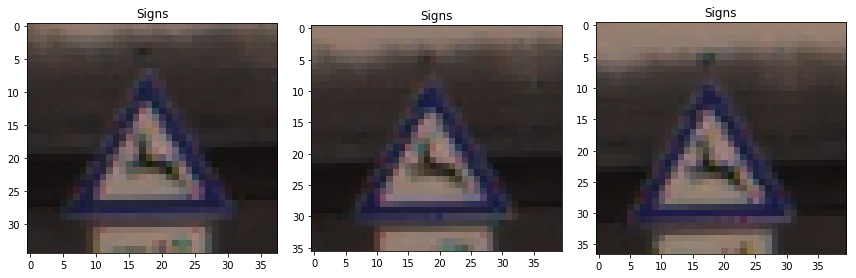

In [9]:
plt.figure(figsize = (12,12)) #sizing

for i in range(3): #show 3 photos
    plt.subplot(1, 3, i+1) #1-3(range) 
    image = cv2.imread(namelist[i]) #cv2 to read image
    plt.imshow(image) #plot
    plt.title('Signs')
    plt.tight_layout()
plt.show()


In [10]:
newdata = []

for image in namelist:
    try:
        img_read = plt.imread(image) #read images
        img_resize = cv2.resize(img_read, (30, 30)) #resize 50x50 all the same shape
        img_array = img_to_array(img_resize) #convert into arrays
        newdata.append(img_array) 
    except:
        print('Exception found')

In [11]:
#Convert to arrays instead of lists

image_data = np.array(newdata)
labels = np.array(list(df.ClassId))

In [12]:
#Order our data and then shuffle it to ensure randomness

idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx] #training (x)
labels = labels[idx] #classifier (y)

In [73]:
#Time to split data into train / test sets
from sklearn.model_selection import train_test_split


x_train, x_test, y_train1, y_test1 = train_test_split(image_data, labels, 
                                                    test_size = 0.15, 
                                                    random_state = 42)


In [14]:
#One-hot encode target column
from keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


In [15]:
#Data Shapes

print(x_train.shape) #Image training 
print(x_test.shape) #Image testing

print(y_train.shape) #Label training
print(y_test.shape) #Label Testing

(33327, 30, 30, 3)
(5882, 30, 30, 3)
(33327, 43)
(5882, 43)


In [16]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [18]:
#Create model
model = Sequential()

#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))


#Flatten connects convulation layer with our dense layer
model.add(Flatten())

model.add(Dense(43, activation='softmax'))

#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#padding, pooling
#alexnet arch
#vgg16

In [20]:
m = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size = 100)

Train on 33327 samples, validate on 5882 samples
Epoch 1/3
33327/33327 [==============================] - 59s 2ms/step - loss: 0.3774 - acc: 0.9093 - val_loss: 0.4683 - val_acc: 0.8970
Epoch 2/3
33327/33327 [==============================] - 56s 2ms/step - loss: 0.2638 - acc: 0.9359 - val_loss: 0.4463 - val_acc: 0.9019
Epoch 3/3
33327/33327 [==============================] - 54s 2ms/step - loss: 0.2007 - acc: 0.9540 - val_loss: 0.4048 - val_acc: 0.9181


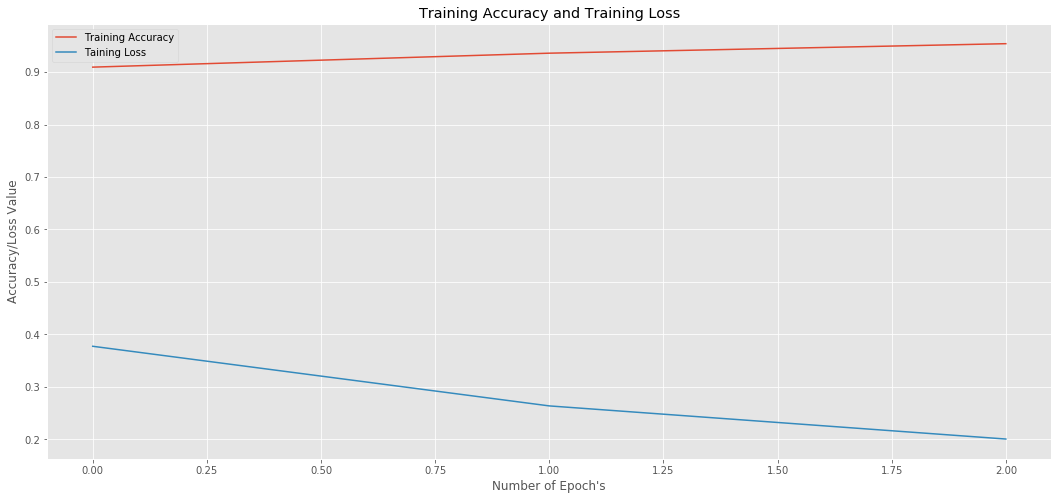

In [22]:
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
plt.figure(figsize = (18,8))

plt.plot(range(3), m.history['acc'], label = 'Training Accuracy')
plt.plot(range(3), m.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.show()

In [23]:
# Visualizating filters
# https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html
from keras import backend as K
K.set_learning_phase(1)
import tensorflow as tf


layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print('Layer dict', layer_dict)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                930219    
Total params: 935,307
Trainable params: 935,307
Non-trainable params: 0
_________________________________________________________________
None


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


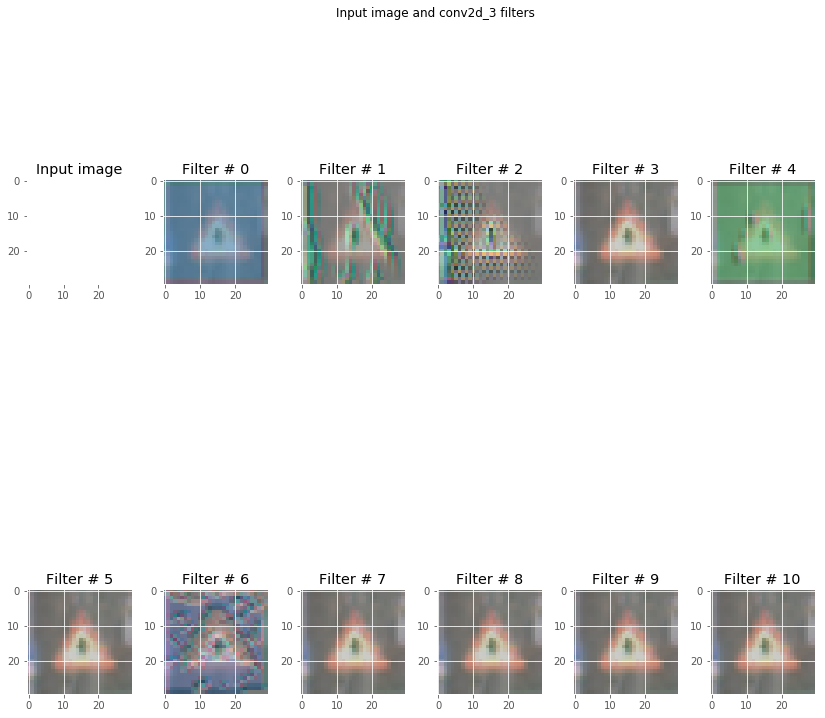

In [64]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[0]).reshape((1, 30, 30, 3)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((30, 30, 3)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((30, 30, 3)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.1, rect = [0, 0, 0.95, 0.95])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('Filter # %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [106]:
# Saliency map
from keras.layers import Input, Conv2DTranspose
from keras.models import Model
from keras.initializers import Ones, Zeros

class SaliencyMask(object):
    """Base class for saliency masks. Alone, this class doesn't do anything."""
    def __init__(self, model, output_index=0):
        """Constructs a SaliencyMask.
        Args:
            model: the keras model used to make prediction
            output_index: the index of the node in the last layer to take derivative on
        """
        pass

    def get_mask(self, input_image):
        """Returns an unsmoothed mask.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        pass

    def get_smoothed_mask(self, input_image, stdev_spread=.2, nsamples=50):
        """Returns a mask that is smoothed with the SmoothGrad method.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        stdev = stdev_spread * (np.max(input_image) - np.min(input_image))

        total_gradients = np.zeros_like(input_image)
        for i in range(nsamples):
            noise = np.random.normal(0, stdev, input_image.shape)
            x_value_plus_noise = input_image + noise

            total_gradients += self.get_mask(x_value_plus_noise)

        return total_gradients / nsamples

class GradientSaliency(SaliencyMask):
    r"""A SaliencyMask class that computes saliency masks with a gradient."""

    def __init__(self, model, output_index=0):
        # Define the function to compute the gradient
        input_tensors = [model.input,        # placeholder for input image tensor
                         K.learning_phase(), # placeholder for mode (train or test) tense
                        ]
        gradients = model.optimizer.get_gradients(model.output[0][output_index], model.input)
        self.compute_gradients = K.function(inputs=input_tensors, outputs=gradients)

    def get_mask(self, input_image):
        """Returns a vanilla gradient mask.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        
        # Execute the function to compute the gradient
        x_value = np.expand_dims(input_image, axis=0)
        gradients = self.compute_gradients([x_value])[0][0]

        return gradients

import keras.backend as K
from keras.layers import Input, Conv2DTranspose
from keras.models import Model
from keras.initializers import Ones, Zeros

class VisualBackprop(SaliencyMask):
    """A SaliencyMask class that computes saliency masks with VisualBackprop (https://arxiv.org/abs/1611.05418).
    """

    def __init__(self, model, output_index=0):
        """Constructs a VisualProp SaliencyMask."""
        inps = [model.input, K.learning_phase()]           # input placeholder
        outs = [layer.output for layer in model.layers]    # all layer outputs
        self.forward_pass = K.function(inps, outs)         # evaluation function
        
        self.model = model

    def get_mask(self, input_image):
        """Returns a VisualBackprop mask."""
        x_value = np.expand_dims(input_image, axis=0)
        
        visual_bpr = None
        layer_outs = self.forward_pass([x_value, 0])

        for i in range(len(self.model.layers)-1, -1, -1):
            if 'Conv2D' in str(type(self.model.layers[i])):
                layer = np.mean(layer_outs[i], axis=3, keepdims=True)
                layer = layer - np.min(layer)
                layer = layer/(np.max(layer)-np.min(layer)+1e-6)

                if visual_bpr is not None:
                    if visual_bpr.shape != layer.shape:
                        visual_bpr = self._deconv(visual_bpr)
                    visual_bpr = visual_bpr * layer
                else:
                    visual_bpr = layer

        return visual_bpr[0]
    
    def _deconv(self, feature_map):
        """The deconvolution operation to upsample the average feature map downstream"""
        x = Input(shape=(None, None, 1))
        y = Conv2DTranspose(filters=1, 
                            kernel_size=(3,3), 
                            strides=(2,2), 
                            padding='same', 
                            kernel_initializer=Ones(), 
                            bias_initializer=Zeros())(x)

        deconv_model = Model(inputs=[x], outputs=[y])

        inps = [deconv_model.input, K.learning_phase()]   # input placeholder                                
        outs = [deconv_model.layers[-1].output]           # output placeholder
        deconv_func = K.function(inps, outs)              # evaluation function
        
        return deconv_func([feature_map, 0])[0]

In [102]:
from sklearn import preprocessing

# transform training label to one-hot encoding
lb = preprocessing.LabelBinarizer()
lb.fit(y_train1)
Y_train = lb.transform(y_train1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

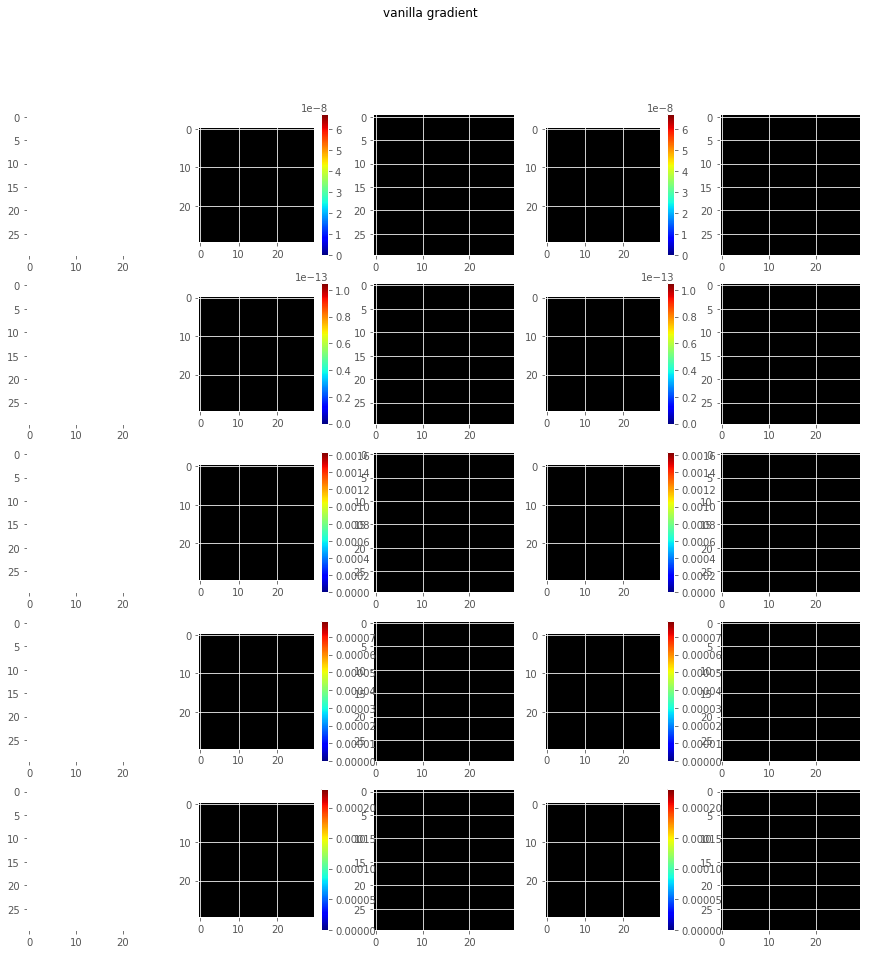

In [107]:
Y_train_label = lb.inverse_transform(Y_train)

fig, ax = plt.subplots(5, 5, figsize = (15, 15))
fig.suptitle('vanilla gradient')
for i in range(5):
    img = np.array(x_train[i])
    
    vanilla = GradientSaliency(model, Y_train_label[i])
    mask = vanilla.get_mask(img)
    filter_mask = (mask > 0.0).reshape((30, 30, 3))
    smooth_mask = vanilla.get_smoothed_mask(img)
    filter_smoothed_mask = (smooth_mask > 0.0).reshape((30, 30, 3))


    ax[i, 0].imshow(img.reshape((30, 30, 3)), cmap = 'gray')
    cax = ax[i, 1].imshow(mask.reshape((30, 30, 3)), cmap = 'jet')
    fig.colorbar(cax, ax = ax[i, 1])
    ax[i, 2].imshow(mask.reshape((30, 30, 3)) * filter_mask, cmap = 'gray')
    cax = ax[i, 3].imshow(mask.reshape((30, 30, 3)), cmap = 'jet')
    fig.colorbar(cax, ax = ax[i, 3])
    ax[i, 4].imshow(smooth_mask.reshape((30, 30, 3)) * filter_smoothed_mask, cmap = 'gray')

In [113]:
y_train1

array([11, 23, 10, ...,  3, 42, 38])

In [112]:
Y_train_label

array([11, 23, 10, ...,  3, 42, 38])

In [111]:
img[:2]

array([[[15., 14., 14.],
        [13., 12., 12.],
        [12., 11., 11.],
        [12., 11., 12.],
        [11., 10., 10.],
        [10., 10., 11.],
        [12., 12., 12.],
        [12., 11., 12.],
        [12., 11., 11.],
        [12., 11., 12.],
        [13., 12., 13.],
        [13., 13., 13.],
        [13., 13., 13.],
        [13., 13., 13.],
        [14., 13., 13.],
        [16., 14., 14.],
        [16., 15., 15.],
        [14., 14., 14.],
        [16., 15., 15.],
        [16., 16., 16.],
        [17., 17., 17.],
        [18., 18., 18.],
        [18., 18., 17.],
        [18., 18., 18.],
        [19., 19., 18.],
        [19., 19., 18.],
        [19., 19., 18.],
        [19., 19., 18.],
        [19., 19., 18.],
        [18., 19., 18.]],

       [[16., 15., 15.],
        [16., 14., 13.],
        [15., 13., 13.],
        [13., 12., 12.],
        [11., 10., 11.],
        [12., 11., 12.],
        [15., 14., 14.],
        [14., 12., 13.],
        [12., 11., 10.],
        [13., 11., 12.]